score on train data:  0.6610800744878957
score on test data:  0.6320346320346321


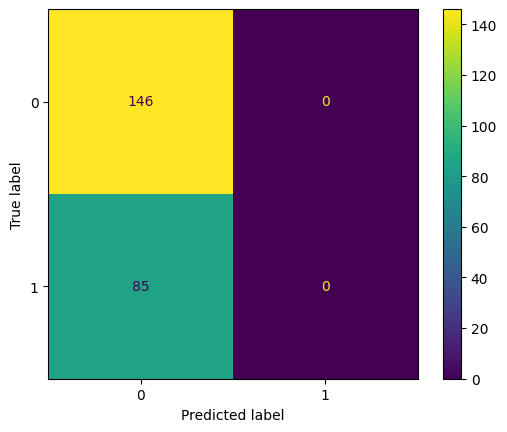

In [2]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

df = pd.read_csv("diabetes.csv")

all_inputs = df[['pregnant-times', 'glucose-concentr', 'blood-pressure', 'skin-thickness', 'insulin', 'mass-index', 'pedigree-func', 'age']].values
all_classes = df['class'].values

label_encoder = LabelEncoder()
all_classes = label_encoder.fit_transform(all_classes)

(train_set, test_set, train_classes, test_classes) = train_test_split(all_inputs, all_classes, train_size=0.7, random_state=1)

clf = MLPClassifier(activation='relu',
                    alpha=0.0001,
                    max_iter=500,
                    hidden_layer_sizes=(6, 3), 
                    random_state=1)

clf.fit(train_set, train_classes)     
clf.score(train_set, train_classes)

predictions_train = clf.predict(train_set)
predictions_test = clf.predict(test_set)
train_score = accuracy_score(predictions_train, train_classes)
print("score on train data: ", train_score)
test_score = accuracy_score(predictions_test, test_classes)
print("score on test data: ", test_score)
# print(predictions_train)

confmtx = confusion_matrix(test_classes, predictions_test)
plot = ConfusionMatrixDisplay(confusion_matrix = confmtx)
plot.plot()
plt.show()

Macierz błędu pokazuje, że model "strzela" tylko w 0. Po redukcji ilości neuronów wynik się poprawia, więc model prawdopodobnie się przeucza.